In [66]:
import pandas as pd #Reading the dataset
import numpy as np #numerical calculations
import matplotlib.pyplot as plt #for data visualization
import statsmodels.api as sm #statistical data exploration
#tensorflow :open source used for both ML and DL for computation
from tensorflow.keras.models import Sequential#it is a plain stack of layers
from tensorflow.keras.layers import Dense#Dense layer is the regular deeply connected neural network layer
from tensorflow.keras.layers import LSTM #Long Short Trem Memory

In [67]:
data=pd.read_excel("Sales_Forecasting-Copy1.xlsx")
data.head()

,HQ,Country,State_of_outlet,City_of_outlet,Month,Day,Year,Total_Sales
0,Asia,India,NaN,Bombay (Mumbai),1.0,1.0,2005.0,72.2
1,Asia,India,NaN,Bombay (Mumbai),1.0,2.0,2005.0,72.7
2,Asia,India,NaN,Bombay (Mumbai),1.0,3.0,2005.0,74.3
3,Asia,India,NaN,Bombay (Mumbai),1.0,4.0,2005.0,78.9
4,Asia,India,NaN,Bombay (Mumbai),1.0,5.0,2005.0,81.5


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HQ               17536 non-null  object 
 1   Country          17536 non-null  object 
 2   State_of_outlet  0 non-null      float64
 3   City_of_outlet   17536 non-null  object 
 4   Month            17536 non-null  float64
 5   Day              17536 non-null  float64
 6   Year             17536 non-null  float64
 7   Total_Sales      17536 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.1+ MB


In [69]:
data.describe()

,State_of_outlet,Month,Day,Year,Total_Sales
count,0.0,17536.000000,17536.000000,17536.000000,17536.000000
mean,NaN,6.524179,15.732892,2010.502053,80.117963
std,NaN,3.449400,8.801978,3.452525,13.315486
min,NaN,1.000000,1.000000,2005.000000,-99.000000
25%,NaN,4.000000,8.000000,2008.000000,77.500000
50%,NaN,7.000000,16.000000,2011.000000,82.600000
75%,NaN,10.000000,23.000000,2014.000000,86.100000
max,NaN,12.000000,31.000000,2016.000000,102.500000


In [70]:
# converting month, day, year in right Date format
from datetime import datetime
data['Date'] = data.apply(lambda row: datetime.strptime(f"{int(row.Year)}-{int(row.Month)}-{int(row.Day)}", '%Y-%m-%d'), axis=1)

Let us take a look at how many years of date is present in the datset

In [71]:
data['Date'].min(), data['Date'].max()

(Timestamp('2005-01-01 00:00:00'), Timestamp('2016-12-31 00:00:00'))

## Data Preprocessing

### Dropping the columns

Let us remove the columns which are not necessary for analysis and sorting the sales values using date

In [72]:
data.shape

(17536, 9)

In [73]:
cols = ['Month','Day','Year','City_of_outlet','State_of_outlet','Country','HQ']
data.drop(cols, axis=1, inplace=True)
data = data.sort_values('Date')

In [74]:
data.head()

,Total_Sales,Date
0,72.2,2005-01-01
730,75.8,2005-01-01
1095,61.0,2005-01-01
365,66.5,2005-01-01
1,72.7,2005-01-02


### Checking or null values

Let us check for null values in the dataset 

In [75]:
data.isnull().sum()

Total_Sales    0
Date           0
dtype: int64

We can see that there are no null values in the datset

In [76]:
# groupby the date value to get the sales sum of each order date
data = data.groupby('Date')['Total_Sales'].sum().reset_index()

In [77]:
data.head()

,Date,Total_Sales
0,2005-01-01,275.5
1,2005-01-02,275.5
2,2005-01-03,278.6
3,2005-01-04,279.3
4,2005-01-05,281.4


In [78]:
sale = np.array(data['Total_Sales'])

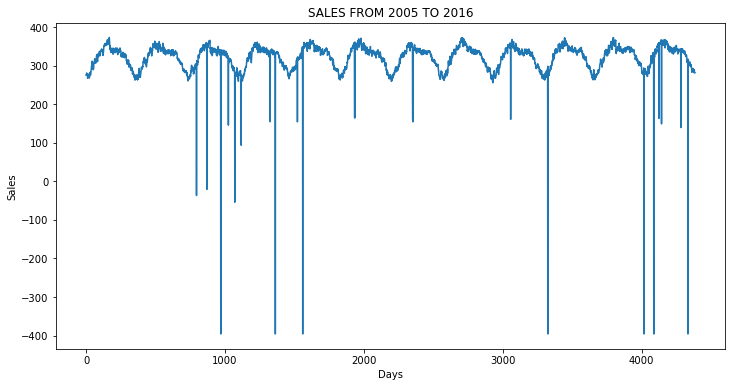

In [79]:
# Plotting Given Data
plt.figure(figsize=(12,6))
plt.plot(sale)
plt.title('SALES FROM 2005 TO 2016')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.show()

In [80]:
training_size=int(len(sale)*0.80)
test_size=len(sale)-training_size
train_data,test_data=sale[0:training_size],sale[training_size:]

In [81]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [82]:
xtrain, ytrain = prepare_data(train_data, 10)
xtest, ytest = prepare_data(test_data, 10)

In [83]:
xtrain.shape, xtest.shape

((3496, 10), (867, 10))

In [84]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
xtrain = xtrain.reshape((xtrain.shape[0], xtrain.shape[1], 1))
xtest = xtest.reshape((xtest.shape[0], xtest.shape[1], 1))

In [85]:
xtrain.shape, xtest.shape

((3496, 10, 1), (867, 10, 1))

In [86]:
model=Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,activation='relu'))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')

In [87]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 10, 50)            10400     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=150,batch_size=64,verbose=1)

Epoch 1/150
55/55 [==============================] - 3s 19ms/step - loss: 5736.4087 - val_loss: 2421.8662
Epoch 2/150
55/55 [==============================] - 1s 13ms/step - loss: 1037.6720 - val_loss: 2068.4287
Epoch 3/150
55/55 [==============================] - 1s 13ms/step - loss: 1011.1593 - val_loss: 2362.7112
Epoch 4/150
55/55 [==============================] - 1s 13ms/step - loss: 996.3366 - val_loss: 2112.7053
Epoch 5/150
55/55 [==============================] - 1s 13ms/step - loss: 948.1495 - val_loss: 2049.5940
Epoch 6/150
55/55 [==============================] - 1s 13ms/step - loss: 941.6855 - val_loss: 2094.3328
Epoch 7/150
55/55 [==============================] - 1s 13ms/step - loss: 940.4437 - val_loss: 2086.1702
Epoch 8/150
55/55 [==============================] - 1s 13ms/step - loss: 924.7860 - val_loss: 1994.8293
Epoch 9/150
55/55 [==============================] - 1s 13ms/step - loss: 907.3324 - val_loss: 1994.1709
Epoch 10/150
55/55 [==============================] 

55/55 [==============================] - 1s 13ms/step - loss: 872.0010 - val_loss: 1959.6451
Epoch 79/150
55/55 [==============================] - 1s 13ms/step - loss: 854.7069 - val_loss: 1994.1772
Epoch 80/150
55/55 [==============================] - 1s 13ms/step - loss: 868.3777 - val_loss: 2009.1765
Epoch 81/150
55/55 [==============================] - 1s 13ms/step - loss: 865.2413 - val_loss: 1968.6202
Epoch 82/150
55/55 [==============================] - 1s 13ms/step - loss: 861.0776 - val_loss: 1967.5172
Epoch 83/150
55/55 [==============================] - 1s 14ms/step - loss: 976.3804 - val_loss: 2027.5999
Epoch 84/150
55/55 [==============================] - 1s 16ms/step - loss: 925.4508 - val_loss: 2020.9003
Epoch 85/150
55/55 [==============================] - 1s 15ms/step - loss: 880.7708 - val_loss: 1976.3933
Epoch 86/150
55/55 [==============================] - 1s 13ms/step - loss: 873.0878 - val_loss: 2027.7903
Epoch 87/150
55/55 [==============================] - 1s 13

In [ ]:
# Testing the model

In [90]:
a=[[275,281,279,287,271,281,288,255,278,298]]
a

[[275, 281, 279, 287, 271, 281, 288, 255, 278, 298]]

In [91]:
model.predict(a)

array([[283.79242]], dtype=float32)

In [92]:
model.save('forcast_sales.h5')

In [ ]:
# Predict the future 10 days

In [139]:
x_input=sale[4372:4382].reshape(1,-1)
x_input.shape

(1, 10)

In [141]:
temp_input=list(x_input)
temp_input

[array([291.2, 285.6, 285.3, 286.2, 282.3, 290. , 288.4, 283.3, 281.7,
        282. ])]

In [144]:
temp_input=temp_input[0].tolist()

In [145]:
# demonstrate prediction for next 10 days
from numpy import array
lst_output=[]
n_steps=10
i=0
while(i<10):
    
    if(len(temp_input)>=10):
        #print("temp_input",temp_input)
        x_input=np.array(temp_input[0:])
        print("{} day input {}".format(i,x_input))
        x_input=np.expand_dims(x_input, axis=0)
        #x_input=scaler.transform(x_input)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        #yhat=scaler.inverse_transform(yhat)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        print("Please give 10 number of inputs")

0 day input [291.2 285.6 285.3 286.2 282.3 290.  288.4 283.3 281.7 282. ]
0 day output [[279.62125]]
1 day input [285.6        285.3        286.2        282.3        290.
 288.4        283.3        281.7        282.         279.62124634]
1 day output [[277.65918]]
2 day input [285.3        286.2        282.3        290.         288.4
 283.3        281.7        282.         279.62124634 277.65917969]
2 day output [[276.58493]]
3 day input [286.2        282.3        290.         288.4        283.3
 281.7        282.         279.62124634 277.65917969 276.58493042]
3 day output [[276.29916]]
4 day input [282.3        290.         288.4        283.3        281.7
 282.         279.62124634 277.65917969 276.58493042 276.29916382]
4 day output [[275.55356]]
5 day input [290.         288.4        283.3        281.7        282.
 279.62124634 277.65917969 276.58493042 276.29916382 275.55355835]
5 day output [[274.39966]]
6 day input [288.4        283.3        281.7        282.         279.6212463